In [14]:
import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()

data = pd.read_csv('Advertising.csv')

data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

Missing values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


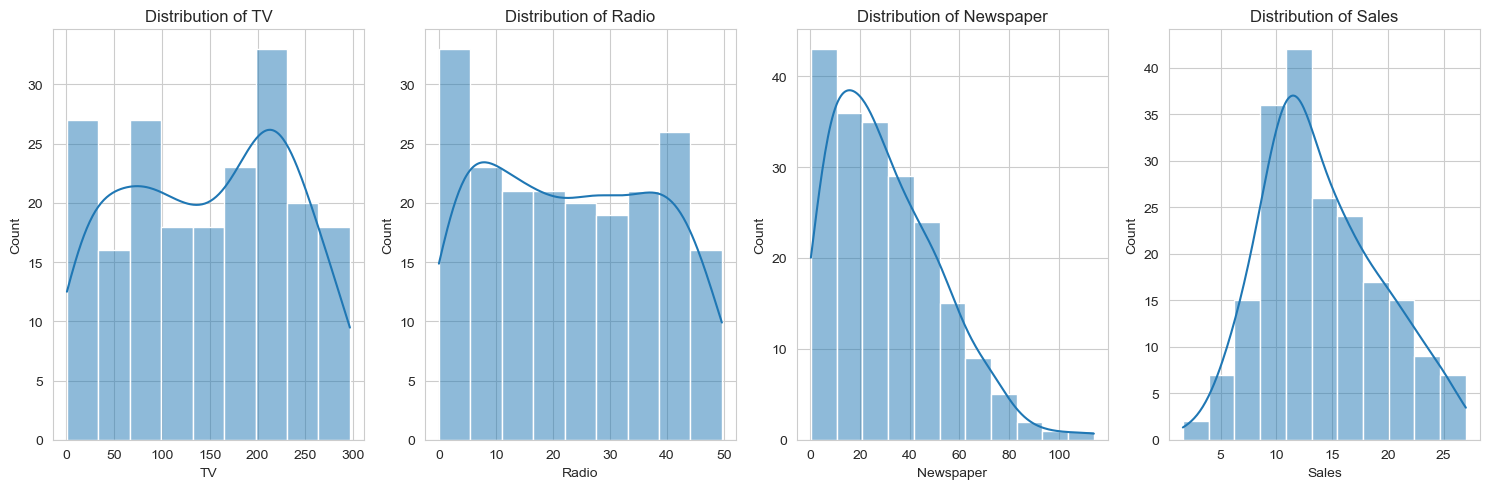

C:\Users\akhil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


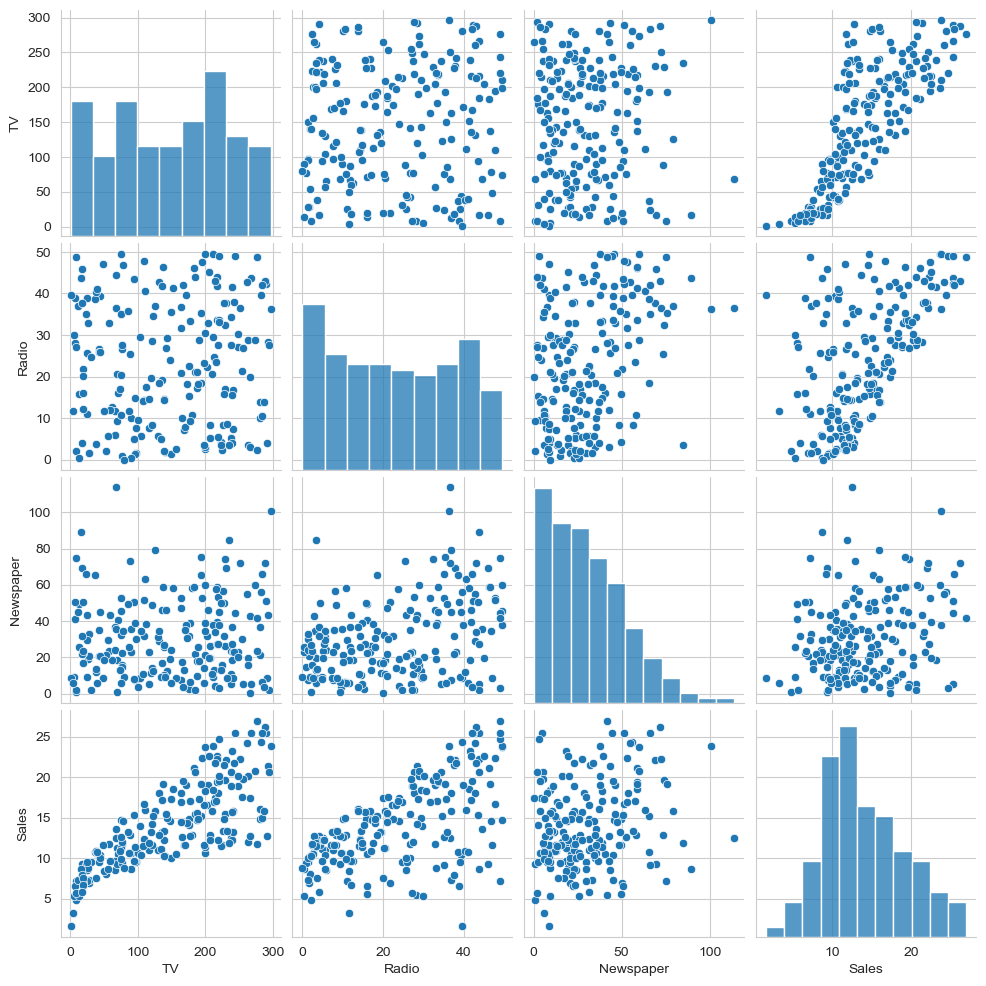

In [15]:
data.drop(columns=['Unnamed: 0'], inplace=True)

statistics = data.describe()

missing_values = data.isnull().sum()

print(statistics)
print('\nMissing values in each column:')
print(missing_values)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(15, 5))
for i, column in enumerate(['TV', 'Radio', 'Newspaper', 'Sales'], start=1):
    plt.subplot(1, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title('Distribution of ' + column)
plt.tight_layout()
plt.show()

sns.pairplot(data)
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
X = data.drop('Sales', axis=1)
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (160, 3) (160,)
Test set: (40, 3) (40,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('Linear Regression MSE:', mse_linear)
print('Linear Regression R-squared:', r2_linear)

Linear Regression MSE: 3.1740973539761015
Linear Regression R-squared: 0.8994380241009121


In [18]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)

ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge Regression MSE:', mse_ridge)
print('Ridge Regression R-squared:', r2_ridge)

Ridge Regression MSE: 3.1740948120927324
Ridge Regression R-squared: 0.89943810463304


In [19]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Lasso Regression MSE:', mse_lasso)
print('Lasso Regression R-squared:', r2_lasso)

Lasso Regression MSE: 3.170521812788133
Lasso Regression R-squared: 0.8995513046486308


In [20]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=42)

decision_tree_reg.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_reg.predict(X_test)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print('Decision Tree Regression MSE:', mse_decision_tree)
print('Decision Tree Regression R-squared:', r2_decision_tree)

Decision Tree Regression MSE: 2.175
Decision Tree Regression R-squared: 0.9310914968293178


In [21]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_reg.fit(X_train, y_train)

y_pred_random_forest = random_forest_reg.predict(X_test)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print('Random Forest Regression MSE:', mse_random_forest)
print('Random Forest Regression R-squared:', r2_random_forest)

Random Forest Regression MSE: 0.5907322499999988
Random Forest Regression R-squared: 0.9812843792541843


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

gradient_boosting_reg.fit(X_train, y_train)

y_pred_gradient_boosting = gradient_boosting_reg.predict(X_test)

mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

print('Gradient Boosting Regression MSE:', mse_gradient_boosting)
print('Gradient Boosting Regression R-squared:', r2_gradient_boosting)

Gradient Boosting Regression MSE: 0.5325817328183275
Gradient Boosting Regression R-squared: 0.9831267080346855


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print('Best parameters found by grid search:', best_params)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found by grid search: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [24]:
best_gradient_boosting_reg = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

best_gradient_boosting_reg.fit(X_train, y_train)

y_pred_best_gradient_boosting = best_gradient_boosting_reg.predict(X_test)

mse_best_gradient_boosting = mean_squared_error(y_test, y_pred_best_gradient_boosting)
r2_best_gradient_boosting = r2_score(y_test, y_pred_best_gradient_boosting)

print('Optimized Gradient Boosting Regression MSE:', mse_best_gradient_boosting)
print('Optimized Gradient Boosting Regression R-squared:', r2_best_gradient_boosting)


Optimized Gradient Boosting Regression MSE: 0.6011540205003613
Optimized Gradient Boosting Regression R-squared: 0.9809541959872563


In [25]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_gradient_boosting_reg, X_train, y_train, cv=5, scoring='r2')

cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print('Cross-validation R-squared scores:', cv_scores)
print('Mean cross-validation R-squared:', cv_mean)
print('Standard deviation of cross-validation R-squared:', cv_std)

Cross-validation R-squared scores: [0.97926589 0.96089313 0.98129873 0.98100461 0.96453321]
Mean cross-validation R-squared: 0.9733991117962253
Standard deviation of cross-validation R-squared: 0.008828029808761685


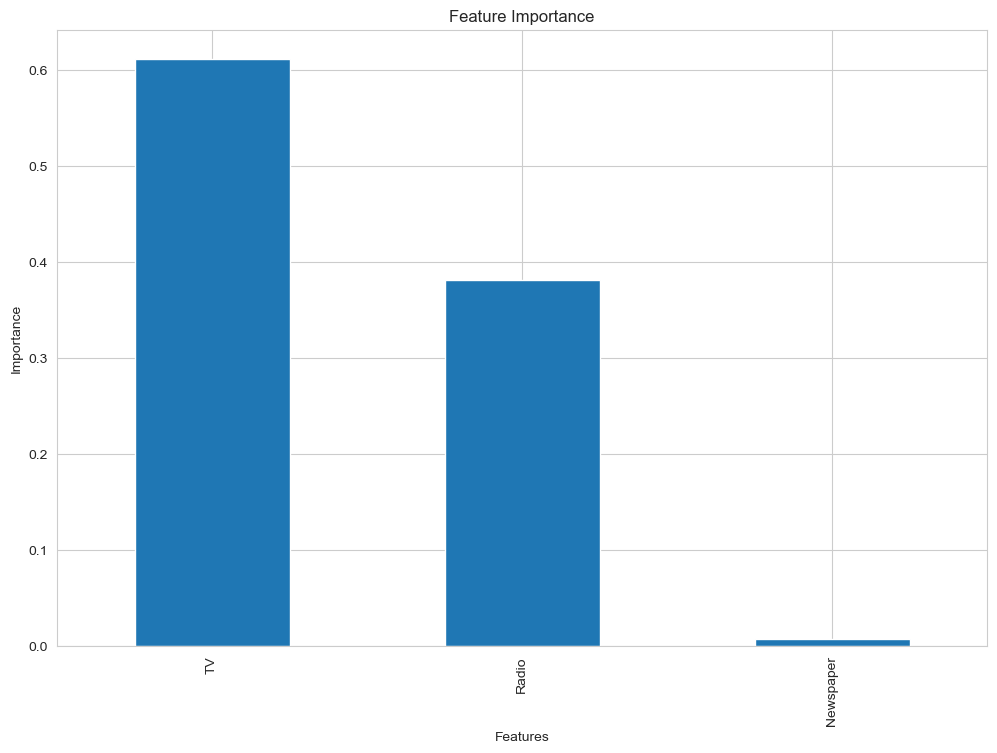

TV           0.611687
Radio        0.381184
Newspaper    0.007130
dtype: float64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = best_gradient_boosting_reg.feature_importances_

features = pd.Series(feature_importances, index=X_train.columns)

sorted_features = features.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sorted_features.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

print(sorted_features)

C:\Users\akhil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


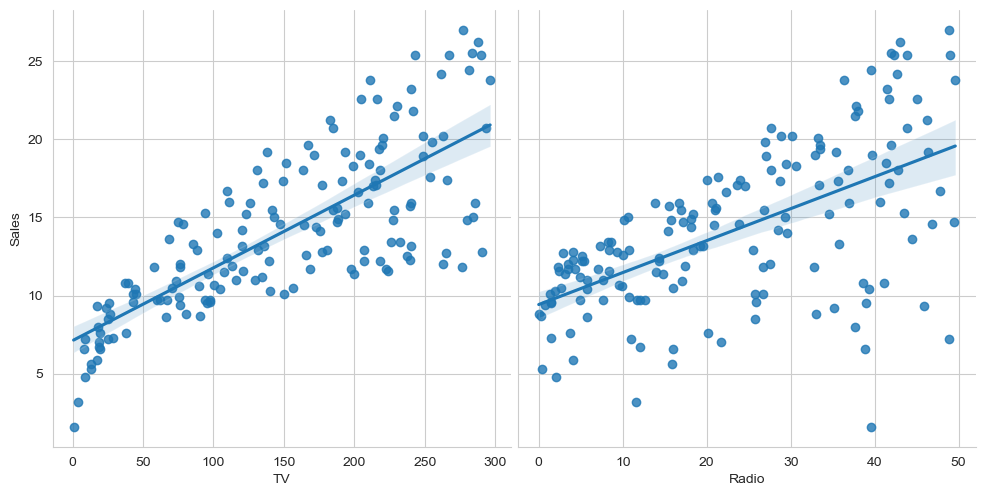

In [27]:
import seaborn as sns

feature_sales_df = pd.DataFrame(data={'TV': X_train['TV'], 'Radio': X_train['Radio'], 'Sales': y_train})

sns.pairplot(feature_sales_df, x_vars=['TV', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='reg')
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = poly.fit_transform(X_train[['TV', 'Radio']])

interaction_model = LinearRegression()
interaction_model.fit(X_train_interaction, y_train)

y_pred_interaction = interaction_model.predict(X_train_interaction)

mse_interaction = mean_squared_error(y_train, y_pred_interaction)
r2_interaction = r2_score(y_train, y_pred_interaction)

print('Interaction Model MSE:', mse_interaction)
print('Interaction Model R-squared:', r2_interaction)

interaction_coefficients = interaction_model.coef_

print('Interaction term coefficient:', interaction_coefficients[2])

Interaction Model MSE: 0.8921936140146893
Interaction Model R-squared: 0.9656005161110535
Interaction term coefficient: 0.001050201242953764


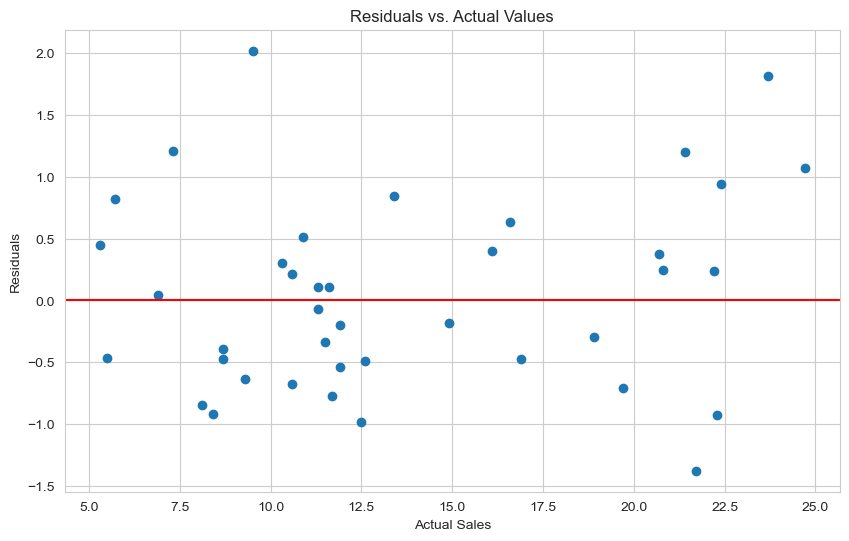

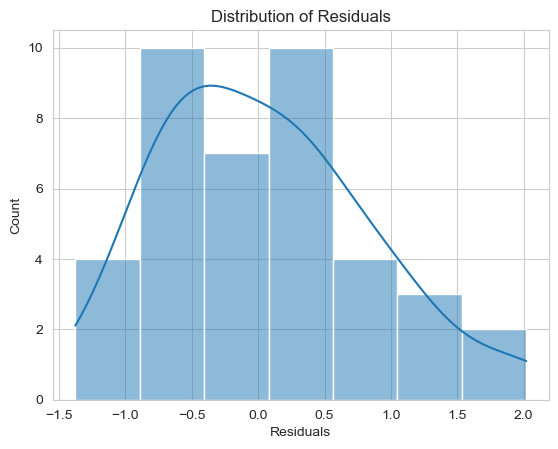

count    40.000000
mean      0.044771
std       0.783908
min      -1.378122
25%      -0.503660
50%      -0.011261
75%       0.462614
max       2.020298
Name: Sales, dtype: float64


In [29]:
residuals = y_test - y_pred_best_gradient_boosting

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

print(residuals.describe())